# O que vende um carro?

Centenas de propagandas gratuitas de veículos são publicadas no site todos os dias. O projeto se trata de estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

Inicialmente, o propóstio deste projeto é identificar fatores que influenciam a venda e o preço dos veículos anunciados no site.

De forma geral, a trilha do projeto será como segue: 
1. Analisar os dados em geral, depois, coluna por coluna em busca de valores fora do comum - corrigir dados onde necessário.
2. Lidar com valores duplicados, que podem afetar as médias e medianas.
3. Lidar com valores ausentes, determinando a melhor forma de substituí-los, ou eliminá-los se for o caso.
4. Com a base de dados limpa, iniciar a análise, procurando a relação dos fatores com o preço do veículo e velocidade de venda, mensurada pelo tempo em que o anúncio fica no site.

Todas as decisões estarão documentadas, com as razões explicadas e o racional por trás delas também.

## Iniciação

Carregando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Carregue dados

Carregando dados

In [2]:
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

Vamos dar uma olhada geral nos dados:

In [3]:
print(df.head())
print()
print(df.info())
print()
print(df.describe())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Co

In [4]:
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Aqui estão os pontos iniciais sobre o que vemos nos dados:

###### Sobre o tipo dos dados
1. Coluna `model_year` como float, podemos alterar para int, apesar de não ser algo muito crítico.
2. Coluna `is_4wd` como float, podemos alterar para 'True' ou 'False', apesar de não ser crítico.
3. Coluna `date_posted` está como object, precisamos alterar para datetime.

###### Sobre dados ausentes
1. Coluna `is_4wd` contém o maior número de valores ausentes, mas parece ser um valor booleano facilmente corrigido - 1 para True, 0 para False, e temos a coluna com dados completos.
2. `model_year`, `cylinders`, `odometer`, `paint_color` estão com valores ausentes, que devemos investigar mais a fundo para identificar se é algo que podemos substituir ou não.

###### Sobre a descrição dos dados
Algumas coisas chamaram atenção - na coluna `price`, temos o mínimo de 1 (que imagino ser 1k), pode ser real, mas para confirmar, o ideal seria investigar. Outro ponto é no `model_year`, valor mínimo de 1908... seria um carro bem antigo, vale a pena investigar para ver se faz sentido, olhar o `model` atrelado, etc. No `odometer` temos um valor máximo de 990 mil km, devemos investigar também, parece um outlier ou erro no dado - é um valor extremamente alto comparado a média e certamente puxa a média pra cima.

### Conclusões e próximos passos

Com base no que vimos acima, os próximos passos são como seguem:
1. Completar os dados ausentes da coluna `is_4wd`, sendo os valores vazios considerados '0' ou 'False'.
2. Alterar a coluna `date_posted` para o tipo datetime.
3. Estudar os valores estranhos - o mínimo da coluna price, o mínimo da coluna model_year, e o máximo do odometer, e aplicar as medidas corretivas necessárias para não comprometer o dataset.
4. Estudar os valores ausentes, ver se existe algum padrão neles ou se são apenas MAR ou MCAR.

## Cuide dos valores ausentes (se houver algum)

Vamos olhar mais de perto para os valores ausentes por coluna.

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

O caso de dados ausentes que podemos tratar inicialmente é o da coluna `is_4wd`, para as outras colunas, vamos investigar um pouco mais.

In [6]:
df['is_4wd'] = df['is_4wd'].fillna(0)
print(df.isna().sum())
display(df)

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


Pronto, coluna `is_4wd` não tem mais ausentes, e a lógica é 1 = True, isto é, é 4wd, e 0 = False, não é 4wd.

Agora vamos olhar mais de perto para as linhas que estão com dados faltantes em paint_color - por ser uma variável categórica, provavelmente teremos que substituir os dados ausentes nessa coluna por 'unknown'.

In [7]:
df['paint_color'] = df['paint_color'].fillna('unknown')
print(df.isna().sum())
print()
print(df['paint_color'].value_counts())
display(df)

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


Não encontrei relação entre a cor ausente e os outros dados, portanto assumo que seja um caso de MAR. Pronto, agora para dados ausentes em `paint_color` temos 'unknown'. 

Para preencher os valores em `cylinders`, talvez seja possível fazer a subsituição dos valores ausentes por valores encontrados em um carro igual no `model` e `model_year`, uma vez que teoricamente se trata de um carro igual, logo há de ter número de cilindros igual.

De qualquer forma, é interessante agora salvar uma planilha alternativa, onde vamos comparar a alternativa (sem tratamento de ausentes, isto é, deletando as linhas com valores ausentes) vs a planilha com os dados limpos, e ver se há grande diferença nos resultados finais.

Vamos lidar com os ausentes da coluna `cylinders` então. Primeiro, criamos uma função para criar uma tabela separada que mostra os cilindros de um veículo baseado no seu modelo e ano do modelo:

In [8]:
#salvando o dataset até o momento
df_a = df.copy()

#função
def cylinders_fill(row):
    model = row['model']
    model_year = row['model_year']
    cylinders = row['cylinders']
    return pd.Series([model, model_year, cylinders], index=['model', 'model_year', 'cylinders'])

Depois, aplicamos a função ao dataframe, gerando a nova tabela. Então removemos as linhas com valores ausentes, e removemos as duplicatas para tornar a tabela menor. Com isso, temos uma tabela com o mapeamento dos cilindros dos carros baseado em seu modelo e ano do modelo.

In [9]:
cylinder_df = df.apply(cylinders_fill, axis=1)
cylinder_df.dropna(inplace = True)
cylinder_df.drop_duplicates(inplace = True)
display(cylinder_df)

,model,model_year,cylinders
0,bmw x5,2011.0,6.0
2,hyundai sonata,2013.0,4.0
3,ford f-150,2003.0,8.0
4,chrysler 200,2017.0,4.0
5,chrysler 300,2014.0,6.0
...,...,...,...
50993,ford f-150,1999.0,4.0
51008,gmc sierra,1993.0,8.0
51068,toyota camry le,2007.0,3.0
51162,nissan frontier,2018.0,8.0


Agora, vamos criar uma função que vai checar se o dado no dataframe original na coluna cylinders é NaN, e se for, identificar nessa linha do dataframe original o model e o model_year e buscar o valor de cylinders para esse model e model_year no dataframe cylinders_df, e então substituir no dataframe original o NaN pelo valor encontrado em cylinders_df para aquele model e model_year.

In [10]:
def replace_cylinders(row):
    if pd.isna(row['cylinders']):
        matching_row = cylinder_df[
            (cylinder_df['model'] == row['model']) &
            (cylinder_df['model_year'] == row['model_year'])
        ]
        if not matching_row.empty:
            return matching_row['cylinders'].values[0]
    return row['cylinders']

df['cylinders'] = df.apply(replace_cylinders, axis=1)

In [11]:
print(df.isna().sum())
print()
print(df['cylinders'].value_counts())

price              0
model_year      3619
model              0
condition          0
cylinders        389
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

8.0     17491
6.0     17381
4.0     15313
10.0      583
5.0       322
3.0        44
12.0        2
Name: cylinders, dtype: int64


Reduzimos bastante o número de ausentes na coluna `cylinders`. Não temos como preencher a coluna `model_year`, e sobre a coluna `odometer`, receio que preenchê-la com média ou mediana pode alterar os resultados finais. 

Por agora, vamos ver quantos % de ausentes na coluna `model_year` temos, possivelmente excluir essas linhas, e estudar um pouco melhor os ausentes de `odometer`, e testar se preencher essa coluna com média ou mediana pode afetar os resultados da análise.

In [12]:
print(df['model_year'].isna().sum()/len(df))

0.07023774866569626


Cerca de 7% do dataframe seria excluído. Vamos excluir essas linhas, 7% não é uma parcela tão significativa dos dados.

In [13]:
df.dropna(inplace = True, subset = ['model_year'])
print(df.isna().sum())
df.shape

price              0
model_year         0
model              0
condition          0
cylinders         26
fuel               0
odometer        7343
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


(47906, 13)

Não vejo como podemos preencher os valores ausentes de `odometer`, pois não vejo como estimar isso a partir de outras variávies sem afetar a análise. Pode ser que as pessoas que listaram esses veículos optaram por não divulgar a quilometragem a fim de evitar que isto tivesse um efeito sobre a percepção do preço do veículo anunciado. Para garantir que estamos trabalhando com os dados mais confiáveis possíveis, e que mostre da forma mais verdadeira a relação das variáveis com o `odometer`, opto por excluir esses dados, pelo menos em um primeiro momento. Vamos então fazer o cálculo da % de dados restantes que temos versus o dataframe original. Além disso, excluir também o restante de linhas com dados ausentes em `cylinder`.

In [14]:
df.dropna(inplace = True, subset = ['odometer'])
df.dropna(inplace = True, subset = ['cylinders'])
print(df.isna().sum())
print()
print(len(df)/len(df_a))


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

0.7868801552644348


Abrimos mão de cerca de 22% dos dados, mas ao mesmo tempo, temos agora uma base muito mais confiável e real do que a anterior. Resta agora dar uma investigada nos valores estranhos por coluna que possamos ter (como por exemplo model_year com valor 1908).

In [15]:
display(df.head())
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73


price
1        632
6995     572
5995     534
4500     505
4995     497
        ... 
2483       1
76000      1
70000      1
8470       1
34495      1
Name: price, Length: 3106, dtype: int64

model_year
2013.0    2976
2012.0    2932
2014.0    2906
2011.0    2873
2015.0    2809
          ... 
1948.0       1
1908.0       1
1936.0       1
1955.0       1
1961.0       1
Name: model_year, Length: 65, dtype: int64

model
ford f-150                  2216
chevrolet silverado 1500    1713
ram 1500                    1374
chevrolet silverado          997
jeep wrangler                881
                            ... 
acura tl                     190
nissan murano                185
chrysler 200                 185
kia sorento                  178
ford f-250 super duty        178
Name: model, Length: 99, dtype: int64

condition
excellent    19507
good         15840
like new      3729
fair          1268
new            113
salvage         87
Name: condition, dtype: int64

cylinders
8.0     13938
6.0

##### Valores 'estranhos' por coluna
No geral, parece que as variáveis categoricas fazem sentido, não sendo necessário fazer alterações aqui.
Vamos dar uma olhada nos modelos mais antigos na coluna `model_year`.

In [16]:
(df
 .query('model_year < 1980')
 .pivot_table(index = ['model_year','model'],
              values = 'price',
              aggfunc = 'count'))

price
model_year model                  
1908.0     gmc yukon             1
1936.0     ford f-150            1
1948.0     chevrolet impala      1
1955.0     ford f250             1
1958.0     chevrolet impala      2
...                            ...
1979.0     chevrolet impala      1
           ford f-150            5
           ford f250             1
           ford ranger           1
           jeep cherokee         1

[76 rows x 1 columns]

O GMC Yukon não é um carro com ano do modelo de 1908.... Mais pra frente, podemos aplicar um filtro a carros 'antigos', como possível ajuste pra base de dados, apesar de que são poucos dados e portanto, não tão significativos.

## Corrija os tipos de dados

Agora, vamos dar uma olhada nas colunas novamente, e ver quais delas devemos alterar os tipos de dados. Em etapas anteriores do projeto, já definimos que uma coluna crítica que precisa de mudança é `date_posted`, passar para tipo datetime.

In [17]:
df = df.reset_index(drop=True)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
3,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
4,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
5,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
6,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
7,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
8,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
9,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29


In [18]:
df['model_year'] = df['model_year'].astype(int)
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')

#checando se funcionou
print(df['model_year'].head(1))
print(df['date_posted'].head(1))

0    2011
Name: model_year, dtype: int64
0   2018-06-23
Name: date_posted, dtype: datetime64[ns]


## Enriqueça os dados

Vamos adicionar algumas colunas extras ao dataset para facilitar a manipulação dos dados. Talvez criar categorias para:
1. `odometer`
2. `days_listed`
3. `car_age`

E adicionar colunas para o dia da semana, o mês e o ano em que a propaganda foi colocada no site. Vamos também criar um dicionário de key:values para a coluna `condition`, para facilitar a manipulação mais pra frente.

In [19]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['weekday_listed'] = pd.DatetimeIndex(df['date_posted']).weekday
df['month_listed'] = pd.DatetimeIndex(df['date_posted']).month
df['year_listed'] = pd.DatetimeIndex(df['date_posted']).year


condition_dic = {'new' : 5, 'like new' : 4, 'excellent' : 3, 'good' : 2, 'fair':1, 'salvage':0}
df['condition'] = df['condition'].map(condition_dic)


In [20]:
# Adicione a idade do veículo quando a propaganda for colocada
df['car_age'] = pd.DatetimeIndex(df['date_posted']).year - df['model_year']+1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_listed,month_listed,year_listed,car_age
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8
1,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7
2,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3
3,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,5
4,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,4


In [21]:
# Adicione a quilometragem média por ano
df['avg_year_km'] = df['odometer']/df['car_age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_listed,month_listed,year_listed,car_age,avg_year_km
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
2,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
3,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,5,11590.800000
4,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,4,19803.000000


In [22]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
df[['odometer', 'days_listed','car_age']].describe()

,odometer,days_listed,car_age
count,40544.000000,40544.000000,40544.000000
mean,115416.857488,39.647321,9.554262
std,65197.035857,28.133560,6.264340
min,0.000000,0.000000,1.000000
25%,70000.000000,19.000000,5.000000
50%,113000.000000,33.000000,8.000000
75%,155000.000000,53.000000,13.000000
max,990000.000000,271.000000,111.000000


Vamos criar funções para categorizar esses dados em ranges de quartis. Vamos chamar os valores da seguinte forma:
 - 0% a 25%:'bottom_q'
 - 25% a 50%: 'inter_low_q'
 - 50% a 75%: 'inter_high_q'
 - 75% a 100%: 'top_q'

In [23]:
#definindo quartis
q1_odo = np.percentile(df['odometer'], 25)
q2_odo = np.percentile(df['odometer'], 50)
q3_odo = np.percentile(df['odometer'], 75)

q1_days = np.percentile(df['days_listed'], 25)
q2_days = np.percentile(df['days_listed'], 50)
q3_days = np.percentile(df['days_listed'], 75)

q1_age = np.percentile(df['car_age'], 25)
q2_age = np.percentile(df['car_age'], 50)
q3_age = np.percentile(df['car_age'], 75)


def odometer_cat(row):
    o_range = row['odometer']
    
    if o_range <= q1_odo:
        return 'bottom_q'
    elif q1_odo < o_range <= q2_odo:
        return 'inter_low_q'
    elif q2_odo < o_range <= q3_odo:
        return 'inter_high_q'
    elif q3_odo < o_range:
        return 'top_q'
        
def days_listed_cat(row):
    o_range = row['days_listed']  
    
    if o_range <= q1_days:
        return 'bottom_q'
    elif q1_days < o_range <= q2_days:
        return 'inter_low_q'
    elif q2_days < o_range <= q3_days:
        return 'inter_high_q'
    elif q3_days < o_range:
        return 'top_q'    
       
def car_age_cat(row):
    o_range = row['car_age']
    
    if o_range <= q1_age:
        return 'bottom_q'
    elif q1_age < o_range <= q2_age:
        return 'inter_low_q'
    elif q2_age < o_range <= q3_age:
        return 'inter_high_q'
    elif q3_age < o_range:
        return 'top_q'     

In [24]:
df['odometer_cat'] = df.apply(odometer_cat, axis =1)
df['days_listed_cat'] = df.apply(days_listed_cat, axis =1)
df['car_age_cat'] = df.apply(car_age_cat, axis =1)

In [25]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,weekday_listed,month_listed,year_listed,car_age,avg_year_km,odometer_cat,days_listed_cat,car_age_cat
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,5,6,2018,8,18125.000000,inter_high_q,bottom_q,inter_low_q
1,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,3,2,2019,7,15714.285714,inter_low_q,top_q,inter_low_q
2,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,1,4,2019,3,26967.666667,inter_low_q,inter_low_q,bottom_q
3,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,2,6,2018,5,11590.800000,bottom_q,bottom_q,bottom_q
4,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,3,12,2018,4,19803.000000,inter_low_q,top_q,bottom_q


Parece que as funções funcionaram corretamente para as 3 colunas!

## Verifique os dados limpos

In [26]:
# imprima as informações gerais/resumidas sobre o DataFrame
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40544 entries, 0 to 40543
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            40544 non-null  int64         
 1   model_year       40544 non-null  int64         
 2   model            40544 non-null  object        
 3   condition        40544 non-null  int64         
 4   cylinders        40544 non-null  float64       
 5   fuel             40544 non-null  object        
 6   odometer         40544 non-null  float64       
 7   transmission     40544 non-null  object        
 8   type             40544 non-null  object        
 9   paint_color      40544 non-null  object        
 10  is_4wd           40544 non-null  float64       
 11  date_posted      40544 non-null  datetime64[ns]
 12  days_listed      40544 non-null  int64         
 13  weekday_listed   40544 non-null  int64         
 14  month_listed     40544 non-null  int64

In [27]:
# imprima uma amostragem dos dados
display(df.head())
print()
display(df.tail())
df.shape

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,weekday_listed,month_listed,year_listed,car_age,avg_year_km,odometer_cat,days_listed_cat,car_age_cat
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,...,2018-06-23,19,5,6,2018,8,18125.000000,inter_high_q,bottom_q,inter_low_q
1,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,3,2,2019,7,15714.285714,inter_low_q,top_q,inter_low_q
2,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,1,4,2019,3,26967.666667,inter_low_q,inter_low_q,bottom_q
3,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,2,6,2018,5,11590.800000,bottom_q,bottom_q,bottom_q
4,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,3,12,2018,4,19803.000000,inter_low_q,top_q,bottom_q


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,weekday_listed,month_listed,year_listed,car_age,avg_year_km,odometer_cat,days_listed_cat,car_age_cat
40539,3750,2005,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,...,2018-08-10,63,4,8,2018,14,7871.428571,inter_low_q,top_q,top_q
40540,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,...,2018-10-03,37,2,10,2018,6,14689.333333,inter_low_q,inter_high_q,inter_low_q
40541,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,...,2018-11-14,22,2,11,2018,17,10676.470588,top_q,inter_low_q,top_q
40542,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,...,2018-11-15,32,3,11,2018,10,12800.000000,inter_high_q,inter_low_q,inter_high_q
40543,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,...,2018-07-02,71,0,7,2018,6,23262.166667,inter_high_q,top_q,inter_low_q


(40544, 21)

## Estude os parâmetros fundamentais

Vamos dar uma olhada aos parâmetros principais do dataset.

Os parâmetros são:
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

Primeiro, vamos gerar histogramas desses valores. Depois, determinar o limite de valor para valores atípicos, e gerar um dataframe sem esses valores atípicos, e então, gerar novamente os histogramas.

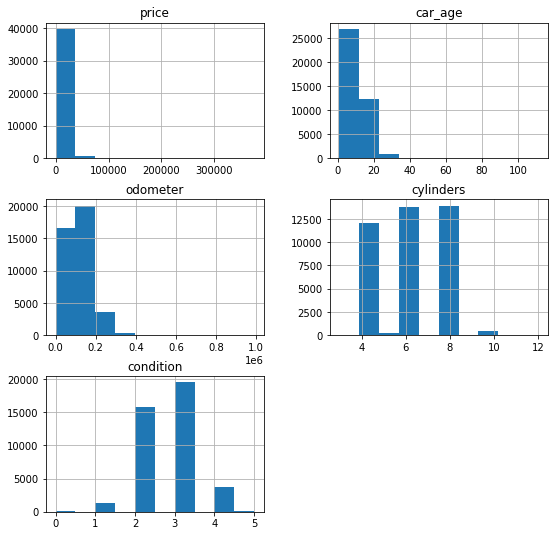

In [28]:
df[['price','car_age','odometer','cylinders','condition']].hist(figsize = (9,9))
plt.show()

Os histogramas de condition e cylinders não possuem valores atípicos. Já para `price`, `car_age` e `odometer`, vemos que o eixo X se expande muito além da concentração dos dados - indicando que possivelmente temos valores atípicos para esses dados. Vamos criar histogramas com uma base de dados sem esses valores atípicos.

## Estude e cuide dos valores atípicos

In [29]:
#encontrando atípicos
up_outlier_values = []
down_outlier_values = []

outlier_columns = ['price','car_age','odometer']
for column in outlier_columns:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    up_outlier = Q3 + 1.5*IQR
    down_outlier = Q1 - 1.5*IQR
    up_outlier_values.append(up_outlier)
    down_outlier_values.append(down_outlier)


In [30]:
print(up_outlier_values)
print(down_outlier_values)
display(df[['price','car_age','odometer']].describe())

[34750.0, 25.0, 282500.0]
[-12850.0, -7.0, -57500.0]


,price,car_age,odometer
count,40544.000000,40544.000000,40544.000000
mean,12170.407237,9.554262,115416.857488
std,10039.171672,6.264340,65197.035857
min,1.000000,1.000000,0.000000
25%,5000.000000,5.000000,70000.000000
50%,9000.000000,8.000000,113000.000000
75%,16900.000000,13.000000,155000.000000
max,375000.000000,111.000000,990000.000000


Como não temos valores negativos nas colunas (visto pelo min do método .describe()), não precisamos filtrar também os outliers negativos.

In [31]:
df_filtered = df.query('price < @up_outlier_values[0] and car_age < @up_outlier_values[1] and odometer < @up_outlier_values[2]')
print(df.shape)
print(df_filtered.shape)
display(df_filtered[['price','car_age','odometer']].describe())

(40544, 21)
(38106, 21)


,price,car_age,odometer
count,38106.000000,38106.000000,38106.000000
mean,11253.457749,9.244870,115119.606545
std,7843.858311,5.134287,58920.186916
min,1.000000,1.000000,0.000000
25%,5000.000000,5.000000,73000.000000
50%,8995.000000,8.000000,114160.500000
75%,15995.000000,13.000000,154535.000000
max,34700.000000,24.000000,282493.000000


## Estude os parâmetros fundamentais sem valores atípicos

Agora que encontramos os valores dos outliers e geramos uma base filtrada sem eles, podemos comparar histogramas gerados para df.filtered versus df, e tirar conclusões para cada um dos histogramas.

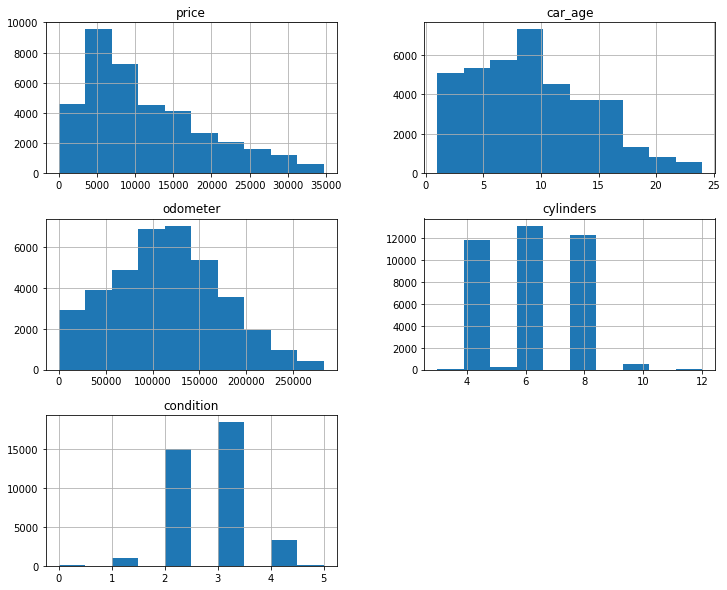

In [32]:
df_filtered[['price','car_age','odometer','cylinders','condition']].hist(figsize = (12,10))
plt.show()

Vemos agora uma distribuição muito melhor para as colunas `price`, `car_age` e `odometer`. Vamos a análise:
 - Price: a concentração do preço dos veículos no dataset está em valores menores de 10 mil, e depois dessa marca, conforme o preço aumenta, o número de veículos diminui - faz sentido, dado que quanto mais caro o veículo, menor é esperada que seja a incidência dele no mercado. Uma analogia simples, quando você sai na rua, você vê mais Toyota Corollas ou mais Ferraris?
 - Car Age: aqui vemos que a maior parcela dos veículos anunciados tem menos de 10 anos - o que pode indicar que no geral, as pessoas tendem a colocar o carro a venda antes dessa marca.
 - Odometer: esse histograma apresenta uma distribuição normal, onde a maior parte dos valores se encontra dentro de um desvio padrão da média. A maior parte dos carros colocados a venda aqui tem entre 75 mil e 150 mil quilometros rodados.

## Tempo de vida das propagandas

count    38106.000000
mean        39.627775
std         28.125317
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Days Listed Up Outlier: 104.0 
Days Listed Down Outlier: -32.0


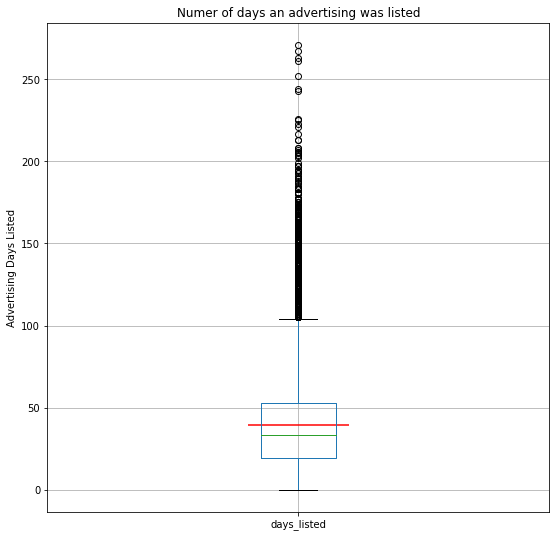

In [43]:
df_filtered.boxplot(column = 'days_listed', figsize = (9,9))
plt.hlines(y=df_filtered['days_listed'].mean(), color = 'red', xmin = 0.9, xmax = 1.1)
plt.ylabel('Advertising Days Listed')
plt.title('Numer of days an advertising was listed')
print(df_filtered['days_listed'].describe())
print()

#dl = days_listed
Q1_dl = np.percentile(df_filtered['days_listed'], 25)
Q3_dl = np.percentile(df_filtered['days_listed'], 75)
IQR_dl = Q3_dl - Q1_dl

dl_up_out = Q3_dl+1.5*IQR_dl
dl_down_out = Q1_dl-1.5*IQR_dl

print('Days Listed Up Outlier:', dl_up_out, '\nDays Listed Down Outlier:', dl_down_out)

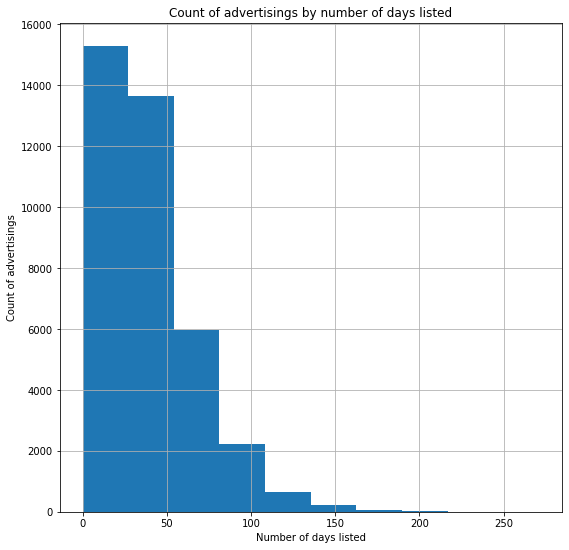

In [40]:
df_filtered['days_listed'].hist(figsize = (9,9))
plt.title('Count of advertisings by number of days listed')
plt.ylabel('Count of advertisings')
plt.xlabel('Number of days listed')
plt.show()

O que podemos ver através do boxplot e do histograma?:
1. O tempo de vida comum de uma propaganda está entre 30 e 40 dias, visto pela média e mediana. 
2. A partir de 104 dias, a propaganda já está listada por um tempo anormalmente longo.
3. Não temos um número de dias onde a propaganda ficou listada por um tempo anormalmente curto, mas podemos ver que se a propaganda ficou listada por menos de 11 dias (média menos o desvio padrão), ela ficou listada por menos tempo que um desvio padrão da média - só lembrando que essa média está afetada pelos outliers de propagandas que ficaram por muito tempo listadas. Usando os quartis, listagens com menos de 19 dias estão no primeiro quartil.

## Média de preços por cada tipo de veículo

,count_of_advertisings,mean_price
type,,
sedan,9437,6980.946487
SUV,9338,10516.058149
truck,8816,15084.862069
pickup,4928,15145.711242
coupe,1591,13555.048397
wagon,1184,8901.094595
mini-van,918,8122.911765
hatchback,809,6755.729295
van,460,8964.843478


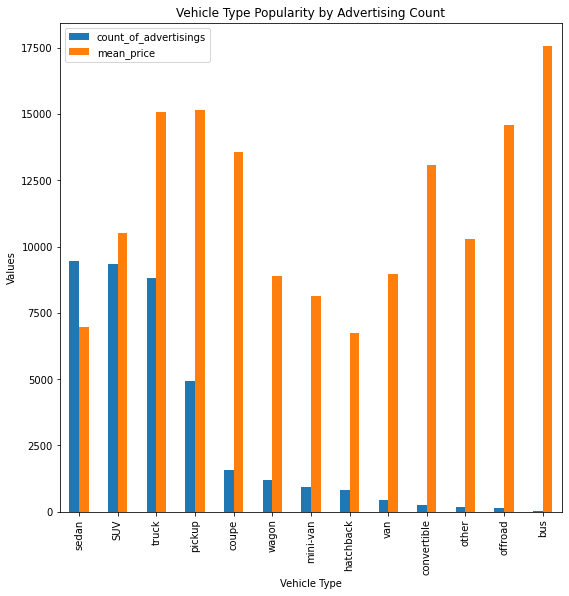

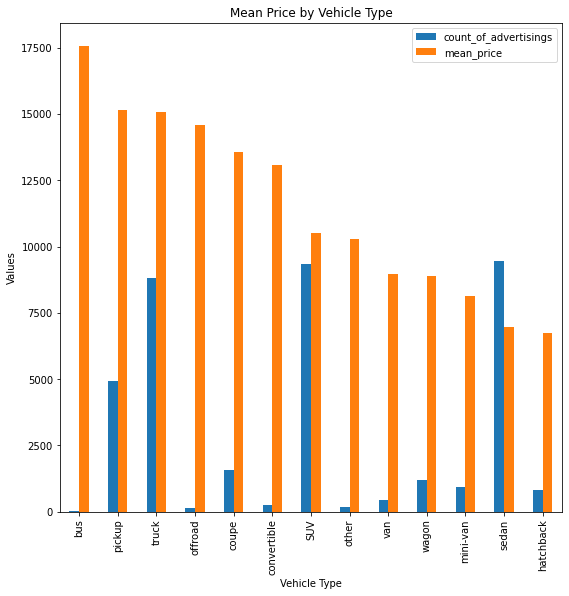

In [46]:
pivot_1 = (df_filtered
           .pivot_table(index='type',
                        values={'price': 'mean', 'days_listed': 'count'},
                        aggfunc={'price': 'mean', 'days_listed': 'count'}
                        )
           .rename(columns={'days_listed': 'count_of_advertisings', 'price': 'mean_price'})
           .sort_values(by = 'count_of_advertisings', ascending = False))
display(pivot_1)

pivot_1.plot(kind = 'bar', figsize = (9,9))
plt.title('Vehicle Type Popularity by Advertising Count')
plt.xlabel('Vehicle Type')
plt.ylabel('Values')
plt.show()

pivot_1.sort_values(by = 'mean_price', ascending = False).plot(kind = 'bar', figsize = (9,9))
plt.title('Mean Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Values')
plt.show()

Os tipos mais comuns em termos de número de propagandas são os Sedans e os SUVs. Em termos de preço médio, os Sedans são os penúltimos mais baratos, enquanto os SUVs se encontram no meio das médias entre os tipos.

## Fatores de preço

Vamos analisar quais fatores mais impactam o preço. Para isso, vamos começar com o tipo mais popular encontrado, os sedans, e analisar qual a relação do preço deles com a idade, quilometragem, condição, tipo de transmissão e cor.

,price,car_age,odometer,condition
price,1.000000,-0.638812,-0.556521,0.292612
car_age,-0.638812,1.000000,0.609201,-0.313329
odometer,-0.556521,0.609201,1.000000,-0.327965
condition,0.292612,-0.313329,-0.327965,1.000000


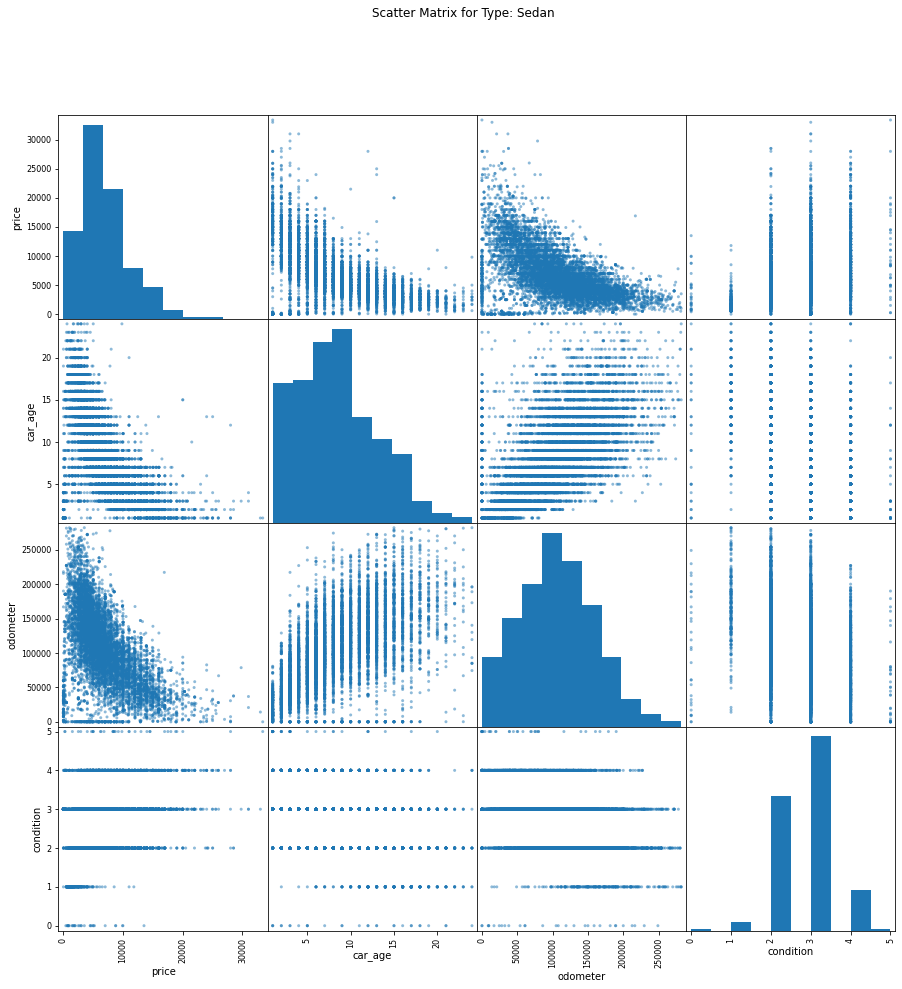

In [56]:
#Estudando o sedan e a relação dos fatores dele com seu preço

#reduzindo o dataset para apenas o que precisamos
main_factors_table = df_filtered[['type','price','car_age','odometer','condition','transmission','paint_color']]
main_factors_sedan = main_factors_table.query('type == "sedan"')

#matriz de correlação para o sedan
display(main_factors_sedan.corr())

#gráficos de correlação para o sedan
pd.plotting.scatter_matrix(main_factors_sedan, figsize = (15,15))
plt.suptitle('Scatter Matrix for Type: Sedan')
plt.show()

###### Sedans - Relações entre variáveis quantitativas e o preço
Através dos gráficos de dispersão apresentados e da matriz de correlações lineares, observamos que:
- Existe certa correlação negativa entre o preço do sedan e sua idade, isto é, quanto maior a idade do carro, menor tende a ser seu preço.
- Existe certa correlação negativa entre o preço do sedan e sua quilometragem, isto é, quanto maior a quilometragem, menor tende a ser seu preço. 
- Temos uma correlação fraca positiva entre a condição do veículo e seu preço, sendo quanto menor(pior) a condição do veículo, menor o seu preço. Apesar disso, esse fator não é um dos que mais impactam o preço.
- Temos certa correlação positiva entre a idade do carro e sua quilometragem, isto é, quanto maior a idade, maior tende a ser a quilometragem, o que faz sentido, uma vez que carros com mais idade teoricamente tiveram mais rodagem/uso. Isso é visto também, apesar de que de forma mais sutil, entre a idade/quilometragem e a condição do veículo, onde tanto quanto maior a idade e maior a quilometragem, menor/pior é a condição do veículo.

In [57]:
#para as variáveis categóricas sedan

display(main_factors_sedan.pivot_table(index = 'paint_color',
                              values = 'type',
                              aggfunc = 'count').sort_values(by = 'type', ascending = False))

display(main_factors_sedan.pivot_table(index = 'transmission',
                              values = 'type',
                              aggfunc = 'count'))

,type
paint_color,
unknown,1686
silver,1605
black,1383
grey,1268
white,1193
blue,963
red,732
custom,224
brown,190


,type
transmission,
automatic,8865
manual,464
other,108


Para que não tenhamos problemas com amostras muito pequenas para as categorias, vamos filtrá-las para a partir de 50 dados, uma vez que os gráficos de boxplot são construídos a partir de medianas, o problema dela é que se temos muito poucos dados, a mediana não é uma boa representação da amostra. Nesse caso, isso exclui orange, purple e yellow da análise.

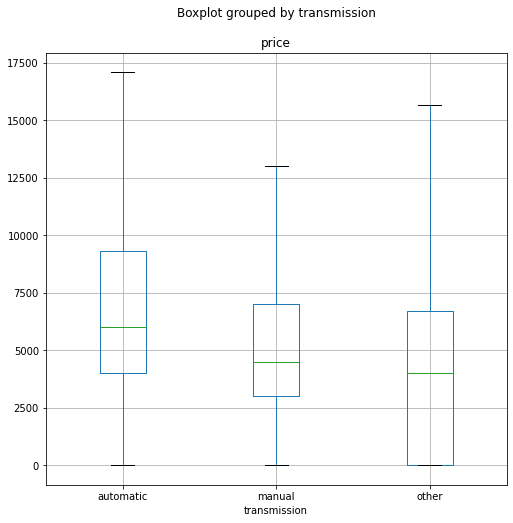

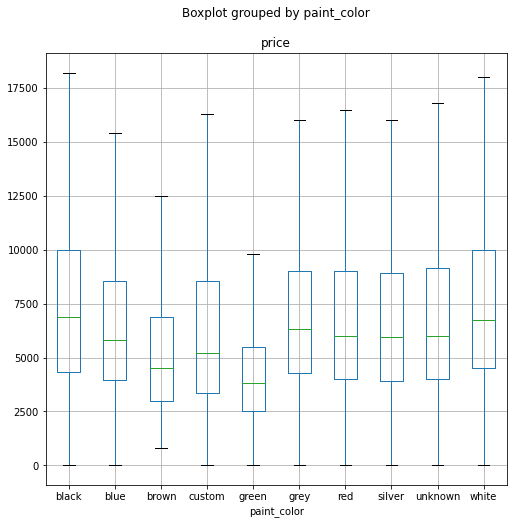

In [58]:
main_fact_sedan_cat = main_factors_sedan.query('paint_color != ["yellow","purple","orange"]')


main_fact_sedan_cat.boxplot(column = 'price', by = 'transmission', figsize = (8,8),showfliers = False)
plt.show()

main_fact_sedan_cat.boxplot(column = 'price', by = 'paint_color', figsize = (8,8),showfliers = False)
plt.show()

#não precisamos ver os outliers filtrados para média de preço para cada categoria, por isso, para melhor visualização,
#estou usando showfliers = False

###### Sedans - Relações entre variáveis categóricas e o preço
Para as relações entre as variáveis categóricas de cor e tipo de transmissão, vistas através dos boxplots, observamos o seguinte:
- O preço para sedans com tipo de transmissão automático tem uma mediana mais alta que para o tipo manual, além de ter um interquartil mais alto também, ou seja, no geral, veículos sedans automáticos tem preços maiores.
- Sobre o preço dos sedans e as cores, carros com cor verde apresentaram a menor mediana e o interquartil mais baixo, seguido da cor marrom. Isso quer dizer que carros dessas cores tendem a ter um preço menor. Para as outras cores, no geral não há discrepância de preços por cor.

Vamos analisar os mesmos aspectos para SUVs agora, o segundo tipo de veículo mais popular por número de propagandas no site.

,price,car_age,odometer,condition
price,1.000000,-0.601942,-0.514816,0.257666
car_age,-0.601942,1.000000,0.618811,-0.318451
odometer,-0.514816,0.618811,1.000000,-0.326374
condition,0.257666,-0.318451,-0.326374,1.000000


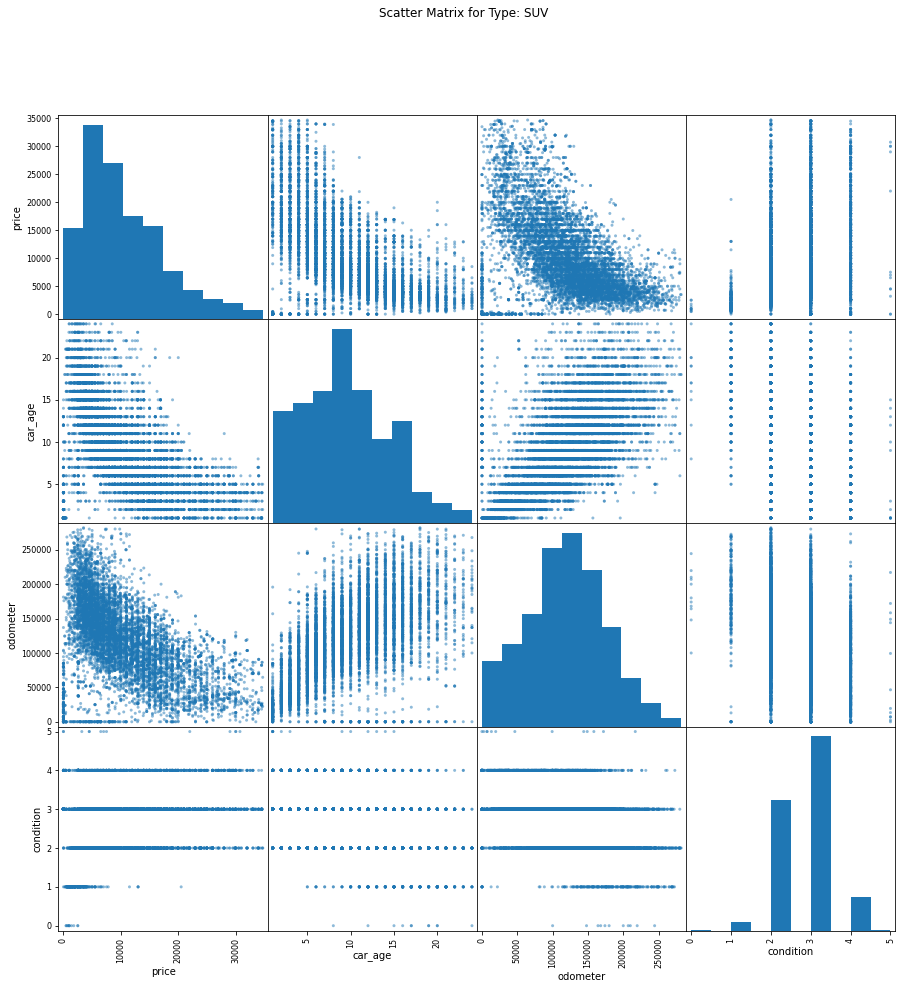

In [60]:
main_factors_suv = main_factors_table.query('type == "SUV"')

#matriz de correlação
display(main_factors_suv.corr())

#gráficos de correlação
pd.plotting.scatter_matrix(main_factors_suv, figsize = (15,15))
plt.suptitle('Scatter Matrix for Type: SUV')
plt.show()

###### SUVs - Relações entre variáveis quantitativas e o preço
Para os SUVs, a análise quantitativa em relação ao preço é praticamente a mesma que a dos sedans: 
 - Alguma correlação negativa entre preço, quilometragem e idade - quanto maior a quilometragem e a idade, menor o preço.
 - Quanto maior a idade, maior tende a ser a quilometragem.


In [61]:
#para as variáveis categóricas sedan

display(main_factors_suv.pivot_table(index = 'paint_color',
                              values = 'type',
                              aggfunc = 'count').sort_values(by = 'type', ascending = False))

display(main_factors_suv.pivot_table(index = 'transmission',
                              values = 'type',
                              aggfunc = 'count'))

,type
paint_color,
unknown,1680
black,1647
white,1465
silver,1211
grey,902
blue,782
red,696
green,320
brown,276


,type
transmission,
automatic,8863
manual,351
other,124


Aqui, vamos excluir purple e yellow da análise, para que a falta de dados nessas categorias não construam uma mediana ruim que não representa a realidade.

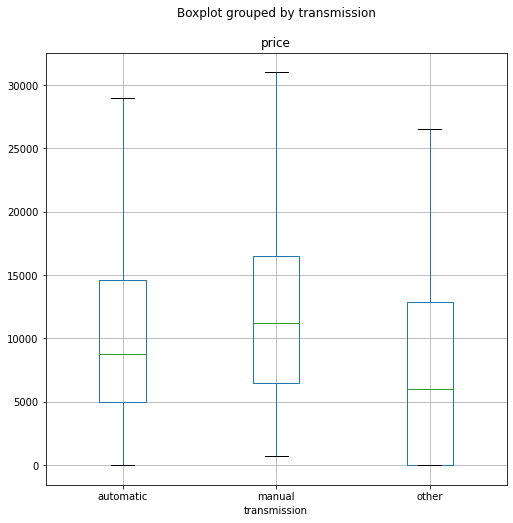

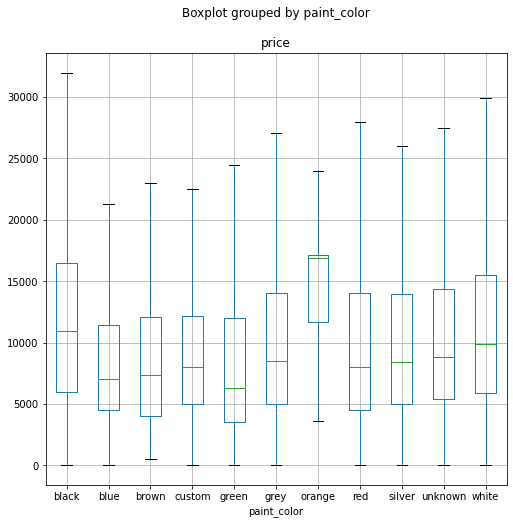

In [62]:
main_fact_suv_cat = main_factors_suv.query('paint_color != ["purple","yellow"]')

main_fact_suv_cat.boxplot(column = 'price', by = 'transmission', figsize = (8,8),showfliers = False)
plt.show()

main_fact_suv_cat.boxplot(column = 'price', by = 'paint_color', figsize = (8,8),showfliers = False)
plt.show()

#não precisamos ver os outliers filtrados para média de preço para cada categoria, por isso, para melhor visualização,
#estou usando showfliers = False

###### SUVs - Relações entre variáveis categóricas e o preço
Para as relações entre as variáveis categóricas de cor e tipo de transmissão para SUVs, vistas através dos boxplots, observamos o seguinte:
 - SUVs de transmissão manual apresentam um interquartil e mediana mais altos que SUVs automáticos, apesar de ser uma diferença pequena. No geral, podemos dizer que SUVs manuais tem um preço ligeiramente mais alto que SUVs automáticos.
 - Já em relação as cores, laranja é a que apresenta maior mediana (mas temos uma amostra limitada para essa categoria) e preto é a categoria com maior bigode superior - isto é, os preços mais altos estão na categoria de cor preta, e a mediana da cor preta é a segunda maior, ficando apenas atrás da laranja. Para as outras cores, estão praticamente no mesmo nível, com interquartis parecidos.

## Conclusão geral

##### A trilha
Discorrendo um pouco sobre a trilha até chegar nesse ponto, aqui temos os pontos altos:
1. Valores ausentes foram preenchidos onde possível estimar ou entender como preenchê-los.
2. Valores duplicados foram retirados da amostra.
3. Valores atípicos foram filtrados, mas preservamos ambas as bases e fizemos uma comparação para ver se os outliers mudavam a relação das variáveis, e também se a retirada das linhas com valores ausentes afetava a análise. O resultado é que esses filtros não mudaram a análise, e obtivemos uma base de dados mais sólida.

##### Os resultados e o objetivo
O objetivo do projeto era identificar os fatores que possivelmente afetam o preço dos veículos, e analisar estas relações. Abaixo, o que foi observado:

1. Sedans são o tipo de carro com maior número de anúncios, e com um dos menores preços médios comparado a média de preços de outros tipos de veículos. Além disso, o preço para veículos desse tipo tende a ser menor quanto maior for a idade e a quilometragem do veículo. Sedans de cor verde e marrom tendem a ter preços menores que o restante das cores para esse tipo de carro. Sedans automáticos tendem a ter um preço um pouco maior que sedans manuais.
- Sedans no geral são mais baratos, quanto maior a quilometragem e idade, menor tende a ser o preço, e se for manual e da cor verde, o preço tende a ser ainda menor.

2. SUVs são o segundo tipo de carro mais popular pelo número de anúncios, e a média de preços para esse tipo de carro é médio em relação aos outros tipos de veículos. SUVs manuais tem preços ligeiramente maiores, e as cores laranja e preto apresentam os maiores preços também. Em relação as variáveis quantitativas que afetam o preço, a relação é bem similar a dos sedans: quanto maior a quilometragem e a idade, menor o preço.
- SUVs tem preços médios em relação a outros tipos de veículos, com SUVs de transmissão manual, cor preta ou laranja e  baixa quilometragem e idade com tendência a ter preços maiores.

3. Em linhas gerais, os fatores que mais afetam o preço dos carros são a idade e a quilometragem, respectivamente, apresentando uma correlação linear negativa entre esses fatores e o preço dos veículos, ou seja, quanto maior a idade/quilometragem, menor tende a ser o preço.

4. Os anúncios tem um ciclo de vida de cerca de 30 a 40 dias, possivelmente porque após esse período, a maioria dos veículos são vendidos e o anúncio retirado. 